# 5.4 로지스틱 회귀(Logistic Regression) 분류 모델

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-unscaled.csv')
df.shape

(8751, 47)

In [3]:
# 참조 코딩
df.dtypes

Temperature        float64
Humidity           float64
Wind speed         float64
Visibility           int64
Solar Radiation    float64
Rented Bike B      float64
Functioning Day      int64
Holiday              int64
Date_1.0             int64
Date_2.0             int64
Date_3.0             int64
Date_4.0             int64
Date_5.0             int64
Date_6.0             int64
Date_7.0             int64
Date_8.0             int64
Date_9.0             int64
Date_10.0            int64
Date_11.0            int64
Date_12.0            int64
Date_13.0            int64
Hour_1.0             int64
Hour_2.0             int64
Hour_3.0             int64
Hour_4.0             int64
Hour_5.0             int64
Hour_6.0             int64
Hour_7.0             int64
Hour_8.0             int64
Hour_9.0             int64
Hour_10.0            int64
Hour_11.0            int64
Hour_12.0            int64
Hour_13.0            int64
Hour_14.0            int64
Hour_15.0            int64
Hour_16.0            int64
H

In [5]:
continuous_vars = ['Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Solar Radiation']

# 나머지 변수를 카테고리형으로 변환
for column in df.columns:
    if column not in continuous_vars:
        df[column] = df[column].astype('category')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Temperature      8751 non-null   float64 
 1   Humidity         8751 non-null   float64 
 2   Wind speed       8751 non-null   float64 
 3   Visibility       8751 non-null   int64   
 4   Solar Radiation  8751 non-null   float64 
 5   Rented Bike B    8751 non-null   category
 6   Functioning Day  8751 non-null   category
 7   Holiday          8751 non-null   category
 8   Date_1.0         8751 non-null   category
 9   Date_2.0         8751 non-null   category
 10  Date_3.0         8751 non-null   category
 11  Date_4.0         8751 non-null   category
 12  Date_5.0         8751 non-null   category
 13  Date_6.0         8751 non-null   category
 14  Date_7.0         8751 non-null   category
 15  Date_8.0         8751 non-null   category
 16  Date_9.0         8751 non-null   category


In [7]:
# 참조 코딩
df.dtypes

Temperature         float64
Humidity            float64
Wind speed          float64
Visibility            int64
Solar Radiation     float64
Rented Bike B      category
Functioning Day    category
Holiday            category
Date_1.0           category
Date_2.0           category
Date_3.0           category
Date_4.0           category
Date_5.0           category
Date_6.0           category
Date_7.0           category
Date_8.0           category
Date_9.0           category
Date_10.0          category
Date_11.0          category
Date_12.0          category
Date_13.0          category
Hour_1.0           category
Hour_2.0           category
Hour_3.0           category
Hour_4.0           category
Hour_5.0           category
Hour_6.0           category
Hour_7.0           category
Hour_8.0           category
Hour_9.0           category
Hour_10.0          category
Hour_11.0          category
Hour_12.0          category
Hour_13.0          category
Hour_14.0          category
Hour_15.0          c

In [8]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장



In [9]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify=target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [10]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.89486
Logreg Test set score:0.90356


In [11]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.88617
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [12]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.90356


In [13]:
# 참조 코딩
print('절편', np.round(best_clf.intercept_, 3))
print('회귀계수', np.round(best_clf.coef_, 3))

절편 [-0.62]
회귀계수 [[ 0.125 -0.068 -0.032 -0.     0.325  4.293  0.754 -0.642 -0.534  0.183
  -0.152  0.08   0.499  0.164 -0.088  0.022  0.04   0.525 -0.829 -0.306
   0.351 -1.767 -3.395 -3.12  -3.207 -1.152  1.224  2.8    1.085 -0.33
  -0.511 -0.481 -0.533 -0.853 -0.467 -0.043  0.433  1.745  1.408  0.914
   1.472  1.689  1.386 -0.907 -0.7   -4.731]]


In [24]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1

,coef
Seasons_3.0,-4.731
Hour_3.0,-3.395
Hour_5.0,-3.207
Hour_4.0,-3.120
Hour_2.0,-1.767
Hour_6.0,-1.152
Seasons_1.0,-0.907
Hour_14.0,-0.853
Date_12.0,-0.829
Seasons_2.0,-0.700


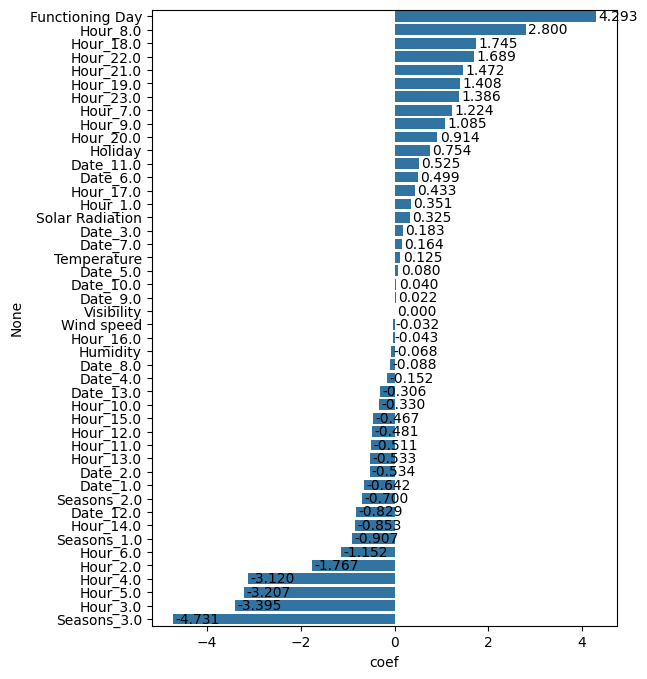

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(6, 8))  # 그래프 전체 크기 설정
ax = sns.barplot(y=dft1.index, x="coef", data=dft1)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # 텍스트 겹침 방지를 위한 조정
    text_width = width + 0.05
    text_x = x + width + 0.05

    # 이전 텍스트 위치 기준으로 조정
    if text_x > ax.get_xlim()[1]:  # 만약 텍스트가 그래프 오른쪽 밖으로 넘어간다면
        text_x = ax.get_xlim()[1]  # 텍스트 위치를 그래프 오른쪽 끝에 맞춤

    ax.annotate(f'{width:.3f}', (text_x, y + height / 2),
                ha='left', va='center', fontsize=10)

# y-축의 범위를 조정하여 세로 간격을 늘림
ax.set_ylim(-0.5, len(dft1)*1 - 0.5)  # 막대 간의 간격 조정

plt.show()

In [15]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1
dft1 = dft1[dft1['Odds_ratio'] < 50]
dft1

,Odds_ratio
Hour_8.0,16.444
Hour_18.0,5.726
Hour_22.0,5.415
Hour_21.0,4.359
Hour_19.0,4.089
Hour_23.0,4.000
Hour_7.0,3.402
Hour_9.0,2.960
Hour_20.0,2.494
Holiday,2.126


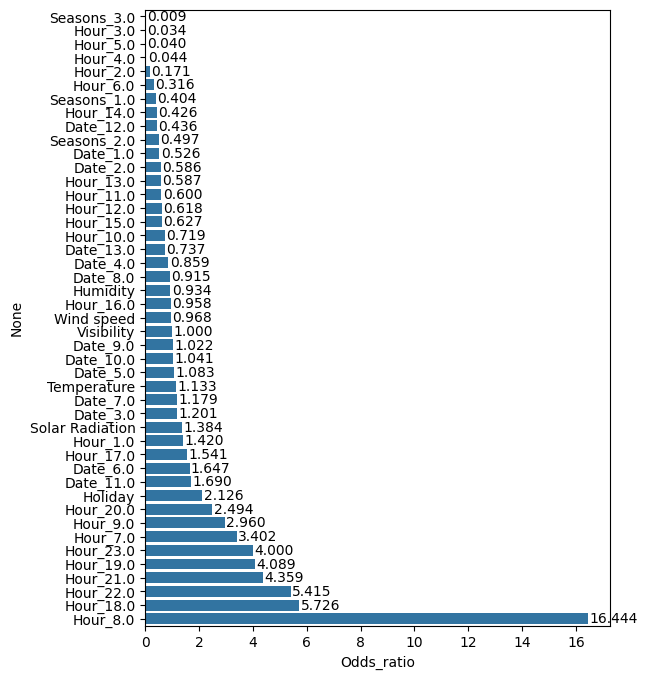

In [22]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(6, 8))  # 그래프 전체 크기 설정
ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # 텍스트 겹침 방지를 위한 조정
    text_width = width + 0.05
    text_x = x + width + 0.05

    # 이전 텍스트 위치 기준으로 조정
    if text_x > ax.get_xlim()[1]:  # 만약 텍스트가 그래프 오른쪽 밖으로 넘어간다면
        text_x = ax.get_xlim()[1]  # 텍스트 위치를 그래프 오른쪽 끝에 맞춤

    ax.annotate(f'{width:.3f}', (text_x, y + height / 2),
                ha='left', va='center', fontsize=10)

# y-축의 범위를 조정하여 세로 간격을 늘림
ax.set_ylim(-0.5, len(dft1)*1 - 0.5)  # 막대 간의 간격 조정

plt.show()


# StandardScaler( )로 표준화한 데이터셋 생성 및 저장

In [ ]:
dfu_standard = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-standard.csv')
dfu_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      8751 non-null   float64
 1   Humidity         8751 non-null   float64
 2   Wind speed       8751 non-null   float64
 3   Visibility       8751 non-null   float64
 4   Solar Radiation  8751 non-null   float64
 5   Rented Bike B    8751 non-null   float64
 6   Functioning Day  8751 non-null   int64  
 7   Holiday          8751 non-null   int64  
 8   Date_1.0         8751 non-null   int64  
 9   Date_2.0         8751 non-null   int64  
 10  Date_3.0         8751 non-null   int64  
 11  Date_4.0         8751 non-null   int64  
 12  Date_5.0         8751 non-null   int64  
 13  Date_6.0         8751 non-null   int64  
 14  Date_7.0         8751 non-null   int64  
 15  Date_8.0         8751 non-null   int64  
 16  Date_9.0         8751 non-null   int64  
 17  Date_10.0     

# 표준화한 데이터셋으로 로지스틱 회귀 재시행

In [ ]:
data = dfu_standard.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = dfu_standard['Rented Bike B']                # 타겟변수만 target에 저장



In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify=target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [ ]:
# 추가 코딩
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.90560
Logreg Test set score:0.90516


In [ ]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.90057
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.90516
